## Carga de datos



In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
dataTFM = pd.read_csv("./cBIOPORTAL/ML/expression_y_clinica_firma_3_cancer_2000.csv",sep='\t')

#no necesitamos cambiar el valor de DFS_STATUS para poder utilizarlo como clase
#dataTFM['DFS_STATUS'] = np.where(dataTFM['DFS_STATUS'] =='1:Recurred/Progressed', 1, 0)
dataTFM['OS_STATUS'] = np.where(dataTFM['OS_STATUS'] =='0:LIVING', 0, 1)

#Changing pandas dataframe to numpy array
features = dataTFM.iloc[:,:49].values
labels = dataTFM.iloc[:,49:50].values


In [36]:
dataTFM.head()


,ADAM19,ADM,AK5,ALDOC,ARL14,AZU1,BAMBI,CCDC3,CCDC91,CD55,...,TDRD7,TMEM56,TXNIP,UNC93B1,VEGFC,ZNF485,D_EDAD,OS_STATUS,OS_MONTHS,DFS_STATUS
0,486.6580,47.5629,5.1699,227.820,0.0000,13.7864,51.3542,116.150,491.828,199.213,...,483.901,348.3470,3571.35,3838.810,59.6260,23.4368,55,0,133.050597,1:Recurred/Progressed
1,515.4980,516.0410,13.5943,2546.490,0.5438,0.5438,218.5970,211.528,266.993,1896.140,...,568.787,145.7310,5023.93,936.922,249.0480,35.3453,50,0,131.669790,0:DiseaseFree
2,835.9020,107.8880,72.5295,495.920,0.0000,9.0662,235.7210,216.682,494.107,945.603,...,445.150,46.2375,7592.02,441.523,188.5770,30.8250,62,0,48.459743,0:DiseaseFree
3,756.1700,99.1489,133.6170,368.511,0.0000,0.8511,3733.6200,219.149,399.575,2797.450,...,498.298,287.6600,9729.36,885.532,179.1490,84.2553,50,0,11.440971,0:DiseaseFree
4,22.5251,72.0802,24.3271,305.890,0.0000,0.4505,959.1170,138.444,405.451,810.902,...,196.869,338.2860,8965.87,287.420,45.5006,90.5507,70,0,8.514975,0:DiseaseFree


## 1. Pre-procesado

In [37]:
#Buscamos valores perdidos
dataTFM.isnull().sum()

ADAM19        0
ADM           0
AK5           0
ALDOC         0
ARL14         0
AZU1          0
BAMBI         0
CCDC3         0
CCDC91        0
CD55          0
CLIC3         0
CYB5R2        0
CYFIP2        0
DHX34         0
F3            0
FLNC          0
GALNT5        0
GEM           0
GPD2          0
GPR110        0
HTRA1         0
IGSF3         0
IL1A          0
KIAA0040      0
LGALS3BP      0
LRRC49        0
LYPD6         0
MSX2          0
MYO1D         0
PLCB2         0
PLEKHA3       0
PRICKLE1      0
PSMB9         0
RIN2          0
SEMA3A        0
SERPINA1      0
SPRY4         0
SRPX          0
ST7L          0
STARD4        0
TDRD7         0
TMEM56        0
TXNIP         0
UNC93B1       0
VEGFC         0
ZNF485        0
D_EDAD        0
OS_STATUS     0
OS_MONTHS     0
DFS_STATUS    0
dtype: int64

In [38]:
numFeatures = features.shape[1]
print("Número de características: {}".format(numFeatures))
print("Número de clases: {}".format(dataTFM.DFS_STATUS.value_counts().shape[0]))

#normalizar los datos de entrada
dataFeatures = dataTFM.iloc[:,0:49]

normalized_df=(dataFeatures-dataFeatures.min())/(dataFeatures.max()-dataFeatures.min())
#print("\nDatos normalizados:")
features = normalized_df.iloc[:,:49].values


Número de características: 49
Número de clases: 2


In [39]:
print(dataTFM.groupby('DFS_STATUS').size())

DFS_STATUS
0:DiseaseFree            844
1:Recurred/Progressed     84
dtype: int64


A continuación dividimos los datos en un conjunto de train y de test, dejando 20% para test:

In [26]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=2017, stratify=labels)


### Arbol de decisión

In [27]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusión normalizada")
    else:
        print('Matriz de confusión')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            verticalalignment="top",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Valor real')
    plt.xlabel('Predicción')
cm_plot_labels=['Sin recurrencia','Recurrencia']    

In [124]:
from sklearn import tree
arbol = tree.DecisionTreeClassifier(max_depth=6);

scores = cross_val_score(arbol, X_train, y_train.ravel(), cv=5)

print("Precisión del cross validation: {:.2f}% (std: {:.3f})".format(scores.mean()*100,
                                          scores.std()),
                                          end="\n\n" )

#obtener las predicciones con el conjunto de datos de test
#entrenar el arbol
arbol.fit(X_train, y_train.ravel())
preds_arbol = arbol.predict(X_test)
labels = np.unique(y_test)
accuracy = np.true_divide(np.sum(preds_arbol == y_test.ravel()), preds_arbol.shape[0])
print("Precisión en el conjunto de test: {:.2f}%".format(accuracy*100))

Precisión del cross validation: 90.43% (std: 0.020)

Precisión en el conjunto de test: 92.47%


Matriz de confusión
[[167   2]
 [ 12   5]]


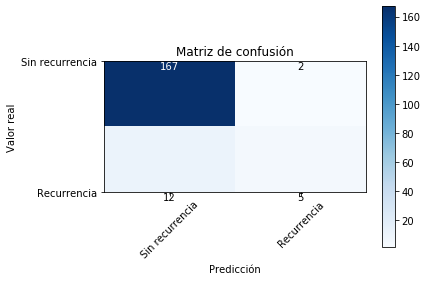

In [125]:
matrix = confusion_matrix(y_test.ravel(), preds_arbol)
plot_confusion_matrix(cm=matrix,classes=cm_plot_labels,title='Matriz de confusión')

In [126]:
E = matrix[0,0]/(matrix[0,0]+matrix[0,1])
S = matrix[1,1]/(matrix[1,0]+matrix[1,1])
print ("Especificidad: ", E)
print ("Sensibilidad: ", S)

Especificidad:  0.9881656804733728
Sensibilidad:  0.29411764705882354


### Random Forest

In [127]:
rfc = RandomForestClassifier(n_estimators=20, max_depth = 10)
scores = cross_val_score(rfc, X_train, y_train.ravel(), cv=5)
print("Precisión del cross-validation: {:.2f}% (std: {:.3f})".format(scores.mean()*100,
                                          scores.std()),
                                          end="\n\n" )
rfc.fit(X_train,  y_train.ravel())
preds_rfc = rfc.predict(X_test)
accuracy = np.true_divide(np.sum(preds_rfc == y_test.ravel()), preds_rfc.shape[0])
print("Precisión en el conjunto de test: {:.2f}%".format(accuracy*100))



Precisión del cross-validation: 91.91% (std: 0.007)

Precisión en el conjunto de test: 92.47%


Matriz de confusión
[[166   3]
 [ 11   6]]


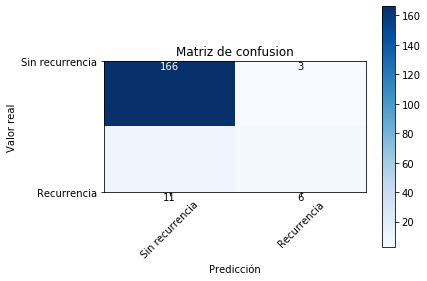

In [128]:
matrix = confusion_matrix(y_test.ravel(), preds_rfc)
plot_confusion_matrix(cm=matrix,classes=cm_plot_labels,title='Matriz de confusion')

In [129]:
E = matrix[0,0]/(matrix[0,0]+matrix[0,1])
S = matrix[1,1]/(matrix[1,0]+matrix[1,1])

print ("Especificidad: ", E)
print ("Sensibilidad: ", S)

Especificidad:  0.9822485207100592
Sensibilidad:  0.35294117647058826


### Boosting

In [130]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=200, max_depth = 20)
scores = cross_val_score(gbc, X_train, y_train.ravel(), cv=5)
print("Precisión del cross-validation: {:.2f}% (std: {:.3f})".format(scores.mean()*100,
                                          scores.std()),
                                          end="\n\n" )
gbc.fit(X_train, y_train.ravel())
preds_gbc = gbc.predict(X_test)
accuracy = np.true_divide(np.sum(preds_gbc == y_test.ravel()), preds_gbc.shape[0])
print("Precisión en el conjunto de test: {:.2f}%".format(accuracy*100))

Precisión del cross-validation: 89.35% (std: 0.025)

Precisión en el conjunto de test: 93.01%


Matriz de confusión
[[169   0]
 [ 13   4]]


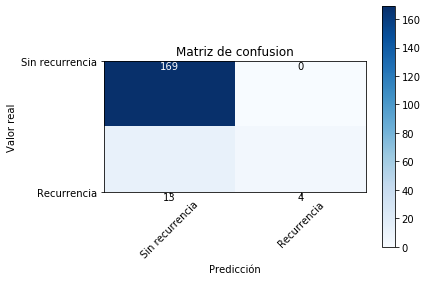

In [131]:
matrix = confusion_matrix(y_test.ravel(), preds_gbc)
plot_confusion_matrix(cm=matrix,classes=cm_plot_labels,title='Matriz de confusion')
#visualizarPrecision_y_Perdida('Inicial', history)    

In [132]:
E = matrix[0,0]/(matrix[0,0]+matrix[0,1])
S = matrix[1,1]/(matrix[1,0]+matrix[1,1])

print ("Especificidad: ", E)
print ("Sensibilidad: ", S)

Especificidad:  1.0
Sensibilidad:  0.23529411764705882
